In [2]:

! pip install -q kaggle
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d gunavenkatdoddi/eye-diseases-classification

rm: cannot remove '/root/.kaggle': No such file or directory
 98% 724M/736M [00:04<00:00, 206MB/s]
100% 736M/736M [00:04<00:00, 183MB/s]


In [4]:
!unzip eye-diseases-classification.zip

Archive:  eye-diseases-classification.zip
  inflating: dataset/cataract/0_left.jpg  
  inflating: dataset/cataract/103_left.jpg  
  inflating: dataset/cataract/1062_right.jpg  
  inflating: dataset/cataract/1083_left.jpg  
  inflating: dataset/cataract/1084_right.jpg  
  inflating: dataset/cataract/1102_left.jpg  
  inflating: dataset/cataract/1102_right.jpg  
  inflating: dataset/cataract/1115_left.jpg  
  inflating: dataset/cataract/1126_right.jpg  
  inflating: dataset/cataract/112_right.jpg  
  inflating: dataset/cataract/1144_left.jpg  
  inflating: dataset/cataract/1144_right.jpg  
  inflating: dataset/cataract/1164_left.jpg  
  inflating: dataset/cataract/1167_right.jpg  
  inflating: dataset/cataract/119_left.jpg  
  inflating: dataset/cataract/1285_left.jpg  
  inflating: dataset/cataract/1415_left.jpg  
  inflating: dataset/cataract/1415_right.jpg  
  inflating: dataset/cataract/1435_left.jpg  
  inflating: dataset/cataract/1444_left.jpg  
  inflating: dataset/cataract/1452_l

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
%config InlineBackend.figure_format = 'retina'

In [ ]:
import fnmatch
import os

In [ ]:
# image files count
cataract_count = len(fnmatch.filter(os.listdir('./dataset/cataract'), '*.*'))
dre_count = len(fnmatch.filter(os.listdir('./dataset/diabetic_retinopathy'), '*.*'))
glaucoma_count = len(fnmatch.filter(os.listdir('./dataset/glaucoma'), '*.*'))
normal_count = len(fnmatch.filter(os.listdir('./dataset/normal'), '*.*'))
total_image_count = cataract_count + dre_count + \
                    glaucoma_count + normal_count
# print count
print('---Categories---')
print('Cataract:', cataract_count)
print('Diabetic retinopathy:', dre_count)
print('Glaucoma:', glaucoma_count)
print('Normal', normal_count)
print()
print('---Total image count---')
print(total_image_count)

---Categories---
Cataract: 1038
Diabetic retinopathy: 1098
Glaucoma: 1007
Normal 1074

---Total image count---
4217


In [ ]:
from PIL import Image 

In [ ]:
im = Image.open('./dataset/glaucoma/1495_left.jpg')
print(im.format)
print(im.mode)
print(im.size) # size already 512 x 512

pixels = np.asarray(im)
print(pixels[0])
print(pixels.shape) # 3 channel last

JPEG
RGB
(512, 512)
[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]
(512, 512, 3)


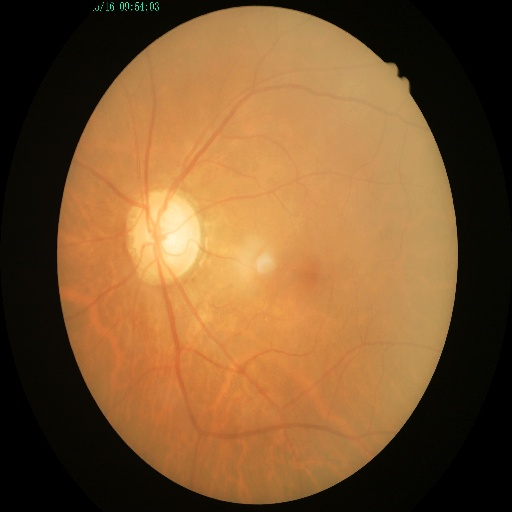

In [ ]:
from IPython import display
display.Image(filename='./dataset/glaucoma/1495_left.jpg', width=200, height=150)

In [ ]:

mean = pixels.mean()
print('Mean: %.3f' % mean)
#  0-255
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Mean: 86.173
Min: 0.000, Max: 255.000


In [ ]:
import hashlib
import glob

In [ ]:
def img_hash(images, dir): # dir is string of subdirectory
    # https://stackoverflow.com/questions/22058048/hashing-a-file-in-python
    hash_list = [] # list of tuples (filename, hash)
    for image in images:
      with open(image, "rb") as f:
          hash = hashlib.blake2b(f.read()).hexdigest() # extract hash code
          filename = os.path.basename(image) # extract subdirectory and filename
          dir_filename = os.path.join(dir, filename)
          hash_list.append((dir_filename, hash)) 
          hash_df = pd.DataFrame(hash_list, columns=['filename','hash']) # dataframe of filenames & hashes
    return hash_df

In [ ]:
cataract_imgs = glob.glob("./dataset/cataract/*.*")
display(img_hash(images = cataract_imgs, dir='cataract')[:3]) # check format
cataract_hashdf = img_hash(images = cataract_imgs, dir='cataract')

filename  \
0     cataract/2234_left.jpg   
1   cataract/_56_3359017.jpg   
2  cataract/_267_6890587.jpg   

                                                hash  
0  5c5591f7845ded6449f8da341efa621af54c470e1788dc...  
1  bf05823f54555ede4b7d1317c8d45d155d7cc7764da1ef...  
2  da4b0bb89136091f9c9fdddff6d3a4a3c0ea25eb75fd7e...

In [ ]:
# hash diabetic retinopathy images
dre_imgs = glob.glob("./dataset/diabetic_retinopathy/*.*")
dre_hashdf = img_hash(images = dre_imgs, dir='dre')

In [ ]:
# hash glaucoma images
glaucoma_imgs = glob.glob("./dataset/glaucoma/*.*")
glaucoma_hashdf = img_hash(images = glaucoma_imgs, dir='glaucoma')

In [ ]:
# hash normal images
normal_imgs = glob.glob("./dataset/normal/*.*")
normal_hashdf = img_hash(images = normal_imgs, dir='normal')

In [ ]:
hash_df = pd.concat([cataract_hashdf, dre_hashdf, glaucoma_hashdf, normal_hashdf], ignore_index=True)
#should be 4217
len(hash_df)

4217

In [ ]:
duplicate_hashes = hash_df[hash_df.duplicated('hash', keep=False)] 
print("Duplicate images based on hashcodes:")
display(duplicate_hashes) 

Duplicate images based on hashcodes:


filename  \
166     cataract/625_left.jpg   
171   cataract/1415_right.jpg   
2294    glaucoma/625_left.jpg   
2301  glaucoma/1415_right.jpg   

                                                   hash  
166   9b41fcbbbdd4a1429f16d915f026d87f7a94f9a77eb3ef...  
171   a029f6e63fa8919142ac8a4c024caf81db515aa44bf4a7...  
2294  9b41fcbbbdd4a1429f16d915f026d87f7a94f9a77eb3ef...  
2301  a029f6e63fa8919142ac8a4c024caf81db515aa44bf4a7...

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
print(tf.__version__) 

2.9.2


What happens after resizing and rescaling: 

In [ ]:
resize_and_rescale = tf.keras.Sequential([   
    layers.Resizing(160,160) ,  
    layers.Rescaling(1./255) 
])

result = resize_and_rescale(pixels)
print(result.shape) 

(160, 160, 3)


In [ ]:
print("Min and max pixel values:", result.numpy().min(), result.numpy().max())

Min and max pixel values: 0.0 1.0


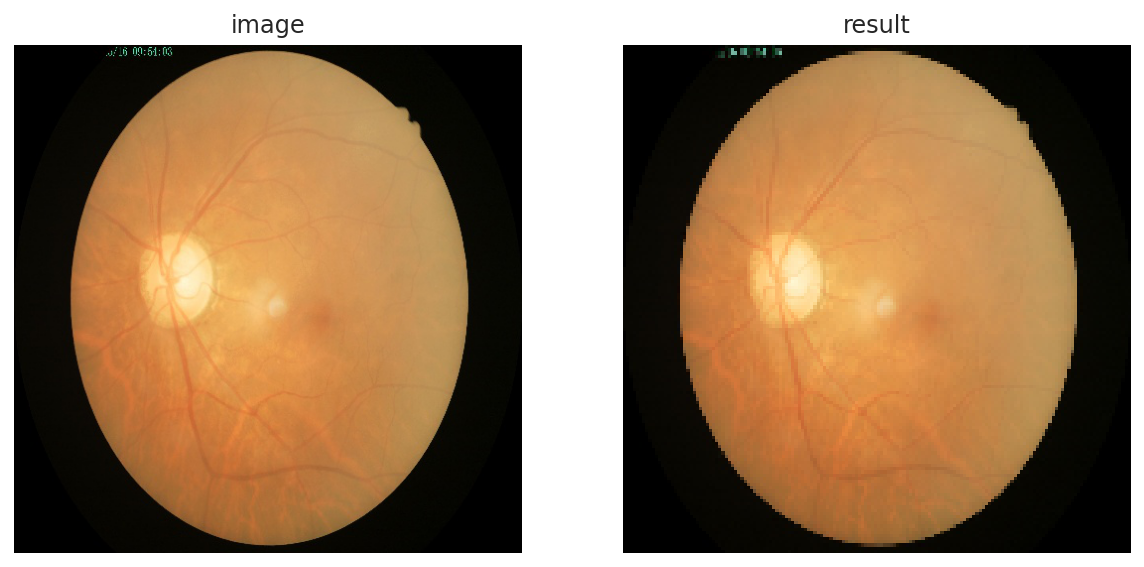

In [ ]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10,8))
ax0.imshow(im)
ax0.axis('off')
ax0.set_title('image')
ax1.imshow(result)
ax1.axis('off')
ax1.set_title('result')
plt.show() 

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders

splitfolders.ratio('./dataset/', output="./work_directory/", seed=1, ratio=(.5,.25,.25))

Copying files: 4217 files [00:01, 2866.47 files/s]


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

image_size = (160, 160) 
batch_size = 32

train_ds = image_dataset_from_directory(
    './work_directory/train',
    image_size=image_size,
    shuffle=False,
    #labels='inferred',
    seed=1,
    batch_size=batch_size,
    label_mode='categorical'
)

val_ds = image_dataset_from_directory(
    './work_directory/val',
    image_size=image_size,
    shuffle=False,
    #labels='inferred',
    seed=1,
    batch_size=batch_size,
    label_mode='categorical'
)

test_ds = image_dataset_from_directory( # for model evaluation later
    './work_directory/test',
    image_size=image_size,
    #labels='inferred',
    seed=1,
    shuffle=False,
    batch_size=batch_size,
    label_mode='categorical'
)

Found 2108 files belonging to 4 classes.
Found 1052 files belonging to 4 classes.
Found 1057 files belonging to 4 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']


In [ ]:
for _, labels in train_ds.take(1):
  print(labels[0])
  print(tf.argmax(labels[0], axis=0))
  break

tf.Tensor([0. 0. 0. 1.], shape=(4,), dtype=float32)
tf.Tensor(3, shape=(), dtype=int64)


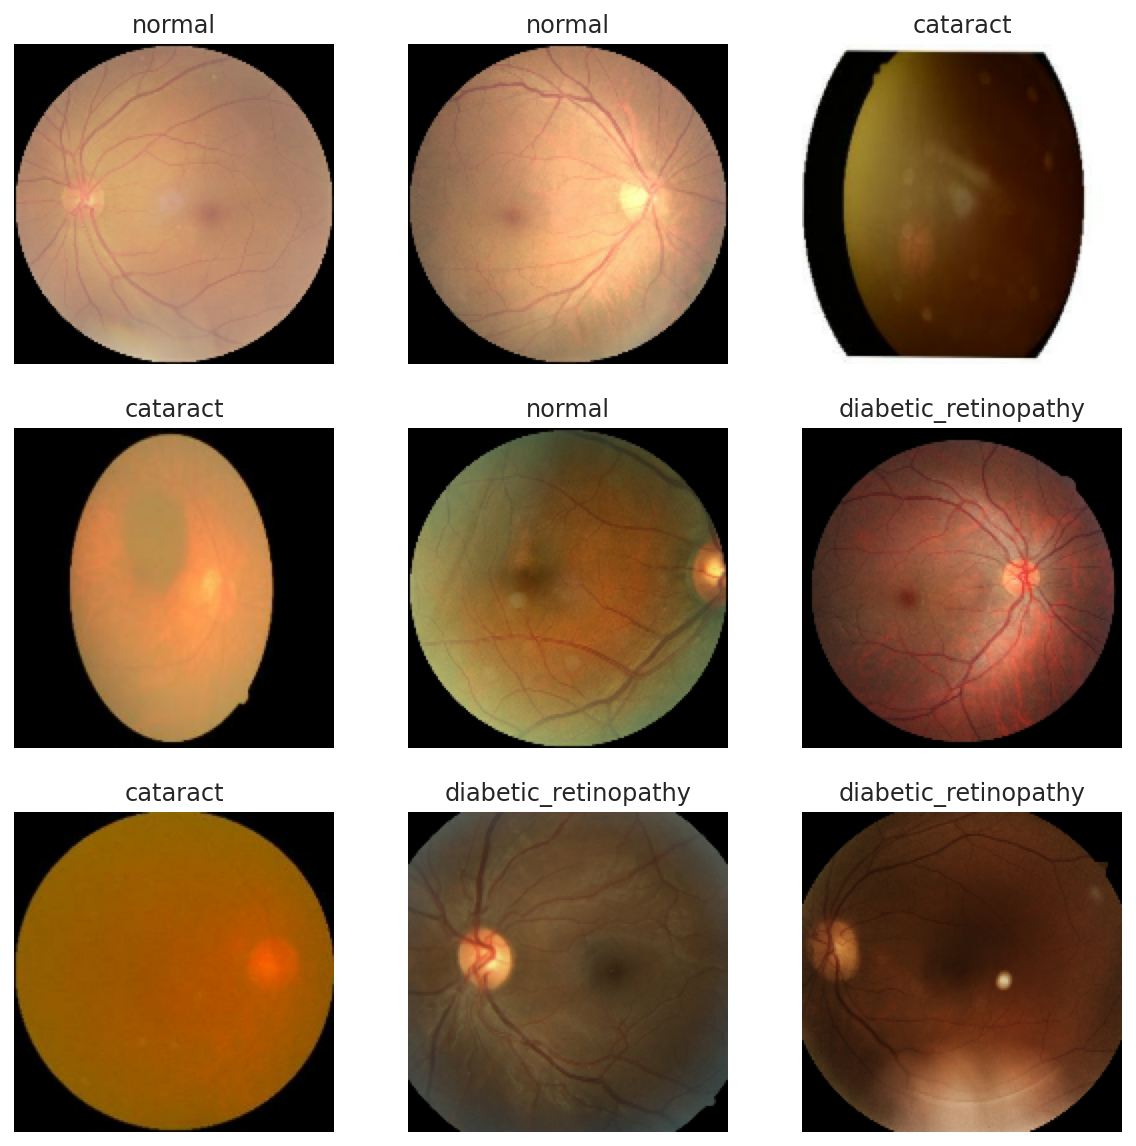

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1): # each image 160 x 160
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[tf.argmax(labels[i], axis=0)])
    plt.axis("off")

In [ ]:
data_augmentation = tf.keras.Sequential(
    [ layers.RandomFlip("horizontal"), 
      layers.RandomRotation(0.1),
      layers.RandomContrast(0.1)
    ])

In [ ]:
def augmented_img():
  for image, _ in train_ds.take(1): 
    plt.figure(figsize=(8, 8))
    first_image = image[0]
    for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
      plt.imshow(augmented_image[0] / 255) # rescale pixel 0 to 1
      plt.axis("off")

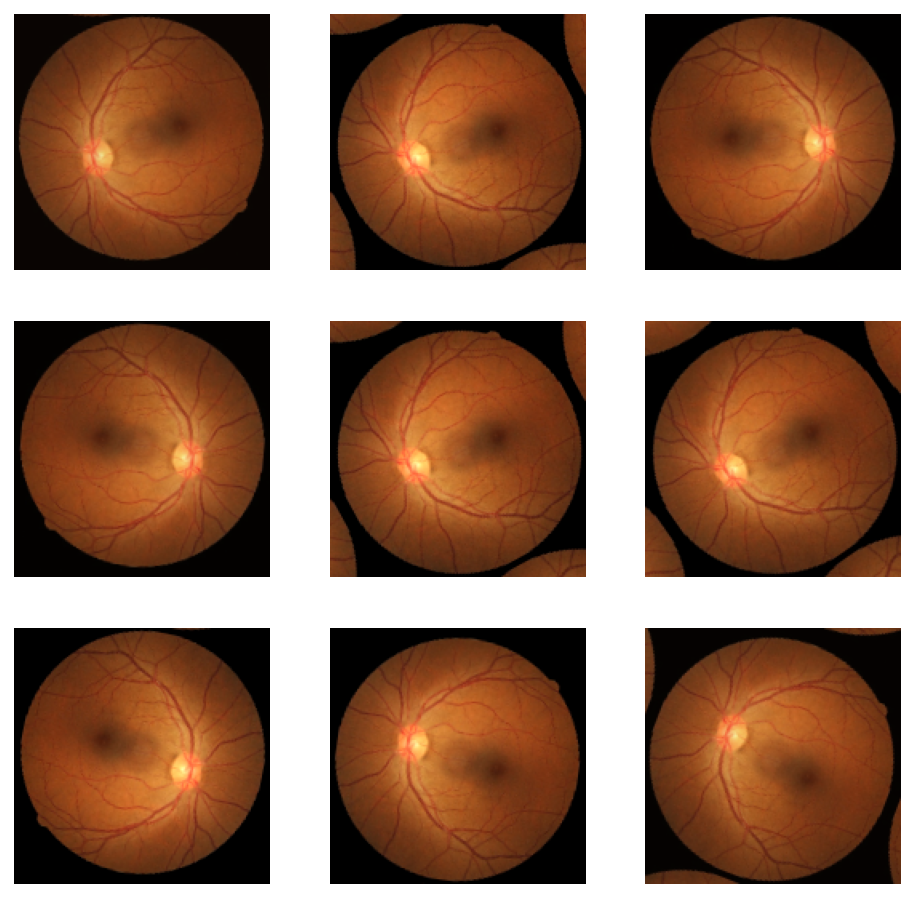

In [ ]:
augmented_img()

In [ ]:
import keras.backend as K 

def f1_score(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
METRICS = [
      tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
      f1_score
]

In [ ]:
from tensorflow.keras.layers import (Dense, Activation, Dropout, Conv2D, 
                                     MaxPooling2D, BatchNormalization)
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model

In [ ]:
def ENet():
  input_shape = (160, 160, 3)
  base_model = tf.keras.applications.EfficientNetV2S(input_shape=input_shape,
                                                     include_top=False,
                                                     weights='imagenet',
                                                     pooling='max')
  base_model.trainable=True 
  x = base_model.output
  x = tf.keras.layers.Rescaling(1./255)(x)
  x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
  x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                    bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
  x=Dropout(rate=.4, seed=123)(x)       
  output=Dense(4, activation='softmax')(x)
  model=Model(inputs=base_model.input, outputs=output)
  model.compile(tf.keras.optimizers.Adamax(learning_rate=0.001), 
                loss='categorical_crossentropy', 
                metrics=METRICS) 
  return model

model = ENet()

In [ ]:
tf.keras.utils.plot_model(model, to_file = "drive/MyDrive/Colab Notebooks/EfficientNet.png", show_shapes=True)

In [ ]:
epochs = 100 

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("drive/MyDrive/Colab Notebooks/ENet_ep{epoch}_val{val_loss:.3f}", save_best_only=True),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10,min_delta=0.001,restore_best_weights=True),
    tf.keras.callbacks.CSVLogger('drive/MyDrive/Colab Notebooks/ENet_history.csv'),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,mode='min',min_lr=0.00001)
]

history = model.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=callbacks)

Epoch 1/100
66/66 [==============================] - 342s 5s/step - loss: 3.3309 - categorical_accuracy: 0.8098 - precision: 0.8804 - recall: 0.7263 - auc: 0.9536 - f1_score: 0.7717 - val_loss: 1.6867 - val_categorical_accuracy: 0.8165 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.9497 - val_f1_score: 0.0000e+00 - lr: 0.0010
Epoch 2/100
66/66 [==============================] - 308s 5s/step - loss: 0.6305 - categorical_accuracy: 0.8828 - precision: 0.9063 - recall: 0.8577 - auc: 0.9790 - f1_score: 0.8805 - val_loss: 1.2820 - val_categorical_accuracy: 0.8973 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.9816 - val_f1_score: 0.0000e+00 - lr: 0.0010
Epoch 3/100
66/66 [==============================] - 313s 5s/step - loss: 0.4437 - categorical_accuracy: 0.9189 - precision: 0.9328 - recall: 0.9018 - auc: 0.9844 - f1_score: 0.9167 - val_loss: 1.2141 - val_categorical_accuracy: 0.8631 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.9709

In [ ]:
history = pd.read_csv('drive/MyDrive/Colab Notebooks/ENet_history.csv')
history.head(3)

epoch       auc  categorical_accuracy  f1_score      loss  precision  \
0      0  0.953632              0.809772  0.771731  3.330880   0.880391   
1      1  0.978962              0.882827  0.880470  0.630520   0.906266   
2      2  0.984410              0.918880  0.916655  0.443655   0.932777   

     recall   val_auc  val_categorical_accuracy  val_f1_score  val_loss  \
0  0.726281  0.949700                  0.816540           0.0  1.686705   
1  0.857685  0.981637                  0.897338           0.0  1.281964   
2  0.901803  0.970887                  0.863118           0.0  1.214088   

   val_precision  val_recall  
0            0.0         0.0  
1            0.0         0.0  
2            0.0         0.0

In [ ]:
acc = history['categorical_accuracy']
val_acc = history['val_categorical_accuracy']

loss = history['loss']
val_loss = history['val_loss']

In [ ]:
def learning_curves(acc,val_acc,loss,val_loss):
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.ylim([min(plt.ylim()),max(plt.ylim())])
  plt.xlim([0,max(plt.xlim())])
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.ylabel('Cross Entropy')
  plt.ylim([min(plt.ylim()),max(plt.ylim())])
  plt.xlim([0,max(plt.xlim())])
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()
  return plt.show()

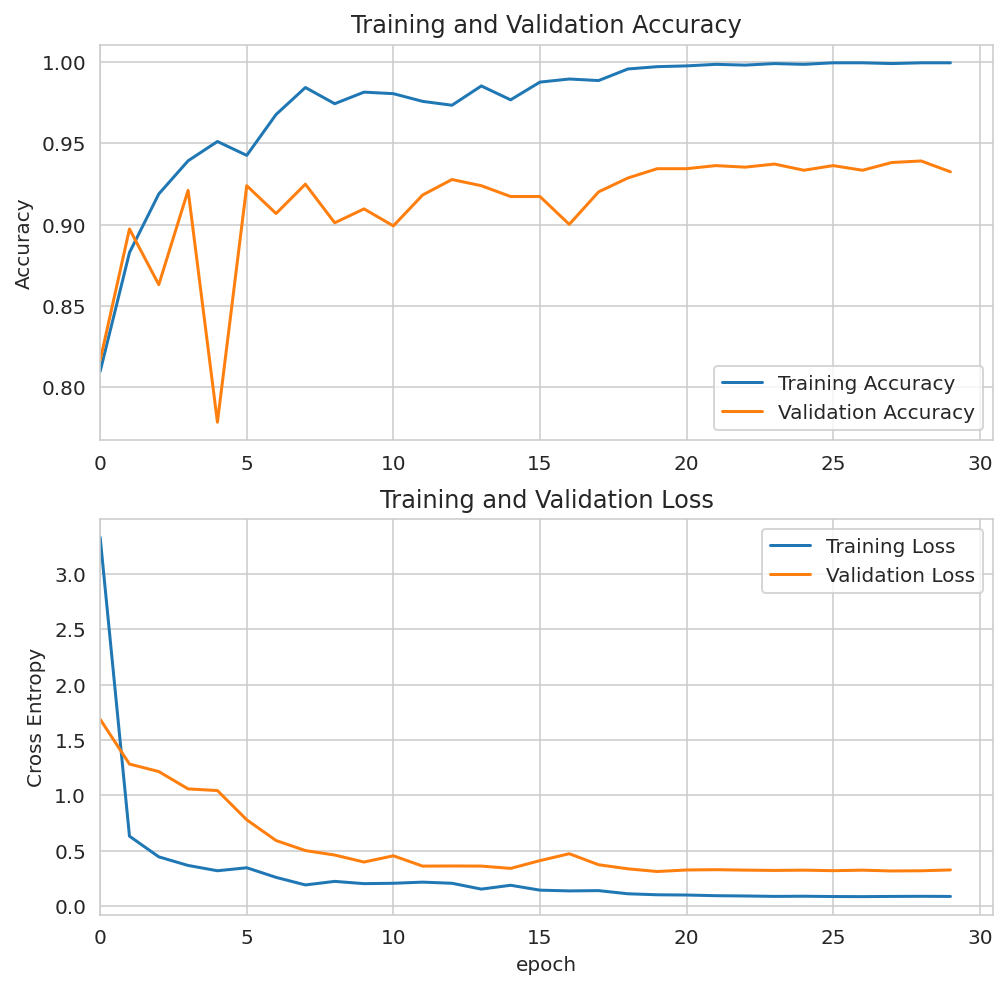

In [ ]:
learning_curves(acc,val_acc,loss,val_loss)

In [ ]:
def metrics(epoch_num):
  val_auc = history.loc[history['epoch']==epoch_num, ['val_auc']].values[0][0]
  auc = history.loc[history['epoch']==epoch_num, ['auc']].values[0][0]
  auc_diff = (auc - val_auc)*100 / auc
  print('AUC percentage difference is:', abs(auc_diff), '%')

  val_acc = history.loc[history['epoch']==epoch_num, ['val_categorical_accuracy']].values[0][0]
  acc = history.loc[history['epoch']==epoch_num, ['categorical_accuracy']].values[0][0]
  acc_diff = (acc - val_acc)*100 / acc
  print()
  print('Accuracy percentage difference is:', abs(acc_diff), '%')

In [ ]:
metrics(epoch_num=19) 

AUC percentage difference is: 1.1002155361973611 %

Accuracy percentage difference is: 6.292216313219368 %



| Name               |   Scores   |
|:-------------------|:----------:|
|AUC                 |0.9885609746|
|Categorical Accuracy|0.9344106317|
|F1 score            |0.9337121248|
|Loss                |0.3110694587|
|Precision           |0.9376797676|
|Recall              |0.9296578169|


In [ ]:
input_shape = (160, 160, 3)
base_model = tf.keras.applications.EfficientNetV2S(input_shape=input_shape,
                                                   include_top=False,
                                                   weights='imagenet',
                                                   pooling='max')
base_model.trainable=True 

82436096/82420632 [==============================] - 1s 0us/step


In [ ]:
def ENet_a():
  inputs = tf.keras.Input(shape=(160, 160, 3))
  x = data_augmentation(inputs)
  x = tf.keras.layers.Rescaling(1./255)(x) # rescaling layer
  x = base_model(x, training=True)
  x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
  x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                    bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
  x=Dropout(rate=.4, seed=123)(x)       
  output=Dense(4, activation='softmax')(x)
  model=Model(inputs=inputs, outputs=output)
  model.compile(tf.keras.optimizers.Adamax(learning_rate=0.001), 
                loss='categorical_crossentropy', 
                metrics=METRICS) 
  return model

model_a = ENet_a()

In [ ]:
epochs = 150 

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("drive/MyDrive/Colab Notebooks/ENet-a_ep{epoch}_val{val_loss:.3f}", save_best_only=True),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10,min_delta=0.001,restore_best_weights=True),
    tf.keras.callbacks.CSVLogger('drive/MyDrive/Colab Notebooks/ENet-a_history.csv'), # save history
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,mode='min',min_lr=0.00001) 
]

history_a = model_a.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=callbacks)

Epoch 1/150
66/66 [==============================] - 382s 5s/step - loss: 7.8087 - categorical_accuracy: 0.6461 - precision: 0.6886 - recall: 0.5863 - auc: 0.8582 - f1_score: 0.6331 - val_loss: 6.7073 - val_categorical_accuracy: 0.7785 - val_precision: 0.8130 - val_recall: 0.7481 - val_auc: 0.9512 - val_f1_score: 0.7798 - lr: 0.0010
Epoch 2/150
66/66 [==============================] - 343s 5s/step - loss: 5.9198 - categorical_accuracy: 0.7993 - precision: 0.8635 - recall: 0.7230 - auc: 0.9501 - f1_score: 0.7851 - val_loss: 5.3566 - val_categorical_accuracy: 0.8432 - val_precision: 0.8680 - val_recall: 0.8127 - val_auc: 0.9707 - val_f1_score: 0.8385 - lr: 0.0010
Epoch 3/150
66/66 [==============================] - 344s 5s/step - loss: 4.8743 - categorical_accuracy: 0.8615 - precision: 0.8938 - recall: 0.8188 - auc: 0.9744 - f1_score: 0.8541 - val_loss: 4.4695 - val_categorical_accuracy: 0.8707 - val_precision: 0.8846 - val_recall: 0.8527 - val_auc: 0.9755 - val_f1_score: 0.8686 - lr: 0.

In [ ]:
history = pd.read_csv('drive/MyDrive/Colab Notebooks/ENet-a_history.csv')
history.head(3)

epoch       auc  categorical_accuracy  f1_score      loss  precision  \
0      0  0.858248              0.646110  0.633138  7.808748   0.688579   
1      1  0.950130              0.799336  0.785109  5.919805   0.863456   
2      2  0.974408              0.861480  0.854138  4.874279   0.893837   

     recall   val_auc  val_categorical_accuracy  val_f1_score  val_loss  \
0  0.586338  0.951233                  0.778517      0.779798  6.707271   
1  0.722960  0.970705                  0.843156      0.838542  5.356585   
2  0.818786  0.975465                  0.870722      0.868642  4.469511   

   val_precision  val_recall  
0       0.813017    0.748099  
1       0.868020    0.812738  
2       0.884615    0.852662

In [ ]:
acc = history['categorical_accuracy']
val_acc = history['val_categorical_accuracy']

loss = history['loss']
val_loss = history['val_loss']

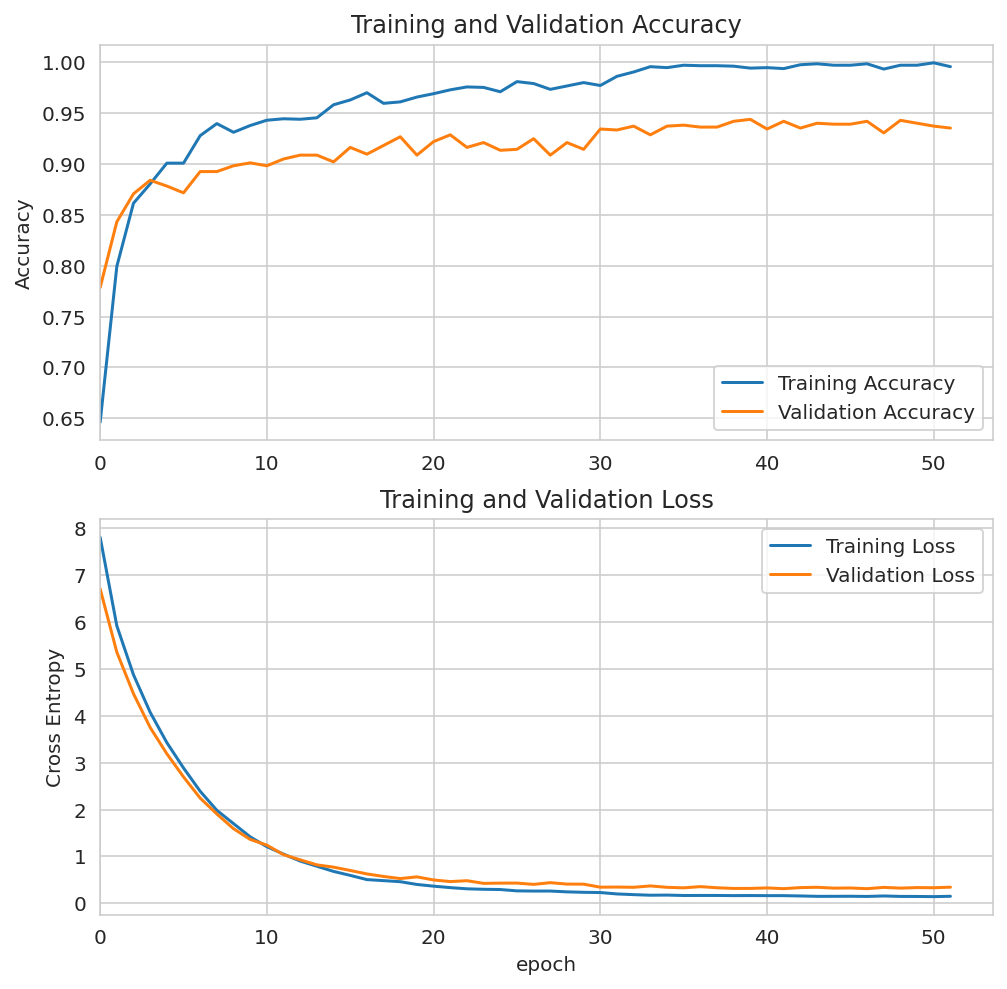

In [ ]:
learning_curves(acc,val_acc,loss,val_loss)

In [ ]:
metrics(epoch_num=46) 

AUC percentage difference is: 0.8346697108894385 %

Accuracy percentage difference is: 5.664225760355845 %


In [ ]:
metrics(epoch_num=30) 

AUC percentage difference is: 0.8179802242193537 %

Accuracy percentage difference is: 4.381668723367181 %




| Name               |   Scores   |
|:-------------------|:----------:|
|AUC                 |0.9916225672|
|Categorical Accuracy|0.9420152307|
|F1 score            |0.943136692|
|Loss                |0.31233868|
|Precision           |0.9455587268|
|Recall              |0.9410646558|


In [ ]:
# choose model for evaluation
# load model
model = tf.keras.models.load_model("drive/MyDrive/Colab Notebooks/ENet_ep20_val0.311", 
                                   custom_objects={'f1_score': f1_score})

In [ ]:
# get predictions for confusion matrix
# class_names = train_ds.class_names # from previous cell
print(class_names)

print('===== test_ds predictions =====')
test_preds = model.predict(test_ds, verbose=1) # get test_ds predictions
# sample test_ds predictions
print(test_preds[2])
for array in [test_preds[2]]:
  print(f'{class_names[0]} probability is: {array[0]:.4f}')
  print(f'{class_names[1]} probability is: {array[1]:.4f}')
  print(f'{class_names[2]} probability is: {array[2]:.4f}')
  print(f'{class_names[3]} probability is: {array[3]:.4f}')
  break

print() #gap

print('===== train_ds predictions =====')
train_preds = model.predict(train_ds, verbose=1) # get train_ds predictions
# sample train_ds predictions
print(train_preds[:1])
for array in train_preds:
  print(f'{class_names[0]} probability is: {array[0]:.4f}')
  print(f'{class_names[1]} probability is: {array[1]:.4f}')
  print(f'{class_names[2]} probability is: {array[2]:.4f}')
  print(f'{class_names[3]} probability is: {array[3]:.4f}')
  break

print() #gap

print('===== val_ds predictions =====')
val_preds = model.predict(val_ds, verbose=1) # get val_ds predictions
# sample val_ds predictions
print(val_preds[:1])
for array in val_preds:
  print(f'{class_names[0]} probability is: {array[0]:.4f}')
  print(f'{class_names[1]} probability is: {array[1]:.4f}')
  print(f'{class_names[2]} probability is: {array[2]:.4f}')
  print(f'{class_names[3]} probability is: {array[3]:.4f}')
  break

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']
===== test_ds predictions =====
34/34 [==============================] - 14s 306ms/step
[0.05048594 0.02294845 0.05543839 0.8711271 ]
cataract probability is: 0.0505
diabetic_retinopathy probability is: 0.0229
glaucoma probability is: 0.0554
normal probability is: 0.8711

===== train_ds predictions =====
66/66 [==============================] - 21s 319ms/step
[[9.9315190e-01 7.9119374e-04 3.5527064e-03 2.5040049e-03]]
cataract probability is: 0.9932
diabetic_retinopathy probability is: 0.0008
glaucoma probability is: 0.0036
normal probability is: 0.0025

===== val_ds predictions =====
33/33 [==============================] - 10s 306ms/step
[[9.9550122e-01 4.7914882e-04 2.3951286e-03 1.6244424e-03]]
cataract probability is: 0.9955
diabetic_retinopathy probability is: 0.0005
glaucoma probability is: 0.0024
normal probability is: 0.0016


In [ ]:
y_pred_probs = np.max(test_preds, axis=-1) 

In [ ]:
y_proba = test_preds 
print(y_proba[:, 0][:3]) 

[0.98516136 0.86210984 0.05048594]


In [ ]:

idx = np.argmax(test_preds, axis=-1)
test_preds = np.zeros( test_preds.shape ) 
test_preds[ np.arange(test_preds.shape[0]), idx] = 1  

#print(train_preds.argmax(axis=1))
#print(train_labels.argmax(axis=1))

# for train_ds
idx = np.argmax(train_preds, axis=-1)
train_preds = np.zeros( train_preds.shape ) 
train_preds[ np.arange(train_preds.shape[0]), idx] = 1  

# for val_ds
idx = np.argmax(val_preds, axis=-1)
val_preds = np.zeros( val_preds.shape ) 
val_preds[ np.arange(val_preds.shape[0]), idx] = 1  

print('Predicted test_ds labels:', test_preds[:5])
print() # gap
print('Predicted train_ds labels:', train_preds[:5])
print() # gap
print('Predicted val_ds labels:', val_preds[:5])

Predicted test_ds labels: [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

Predicted train_ds labels: [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

Predicted val_ds labels: [[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


##### Extracting true labels: 

In [ ]:
# extract true labels and images from test_ds
test_labels = np.concatenate([y for x, y in test_ds], axis=0)
test_images = np.concatenate([x for x, y in test_ds], axis=0)

# extract true labels and images from train_ds
train_labels = np.concatenate([y for x, y in train_ds], axis=0)
train_images = np.concatenate([x for x, y in train_ds], axis=0)

# extract true labels and images from val_ds
val_labels = np.concatenate([y for x, y in val_ds], axis=0)
val_images = np.concatenate([x for x, y in val_ds], axis=0)

print('===== Test set true labels =====') 
print(test_labels[:5])
print() # gap
print('===== Train set true labels =====')
print(train_labels[:5])
print() # gap
print('===== Validation set true labels =====')
print(val_labels[:5])

===== Test set true labels =====
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

===== Train set true labels =====
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

===== Validation set true labels =====
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


##### Plot confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
# Creating a confusion matrix for test_ds predictions
test_cm = confusion_matrix(test_labels.argmax(axis=1), test_preds.argmax(axis=1))
# Creating a confusion matrix for train_ds predictions
train_cm = confusion_matrix(train_labels.argmax(axis=1), train_preds.argmax(axis=1))
# Creating a confusion matrix for val_ds predictions
val_cm = confusion_matrix(val_labels.argmax(axis=1), val_preds.argmax(axis=1))

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
test_cm_df = pd.DataFrame(test_cm,
                          index = class_names, 
                          columns = class_names)
train_cm_df = pd.DataFrame(train_cm,
                           index = class_names, 
                           columns = class_names)
val_cm_df = pd.DataFrame(val_cm,
                         index = class_names, 
                         columns = class_names)

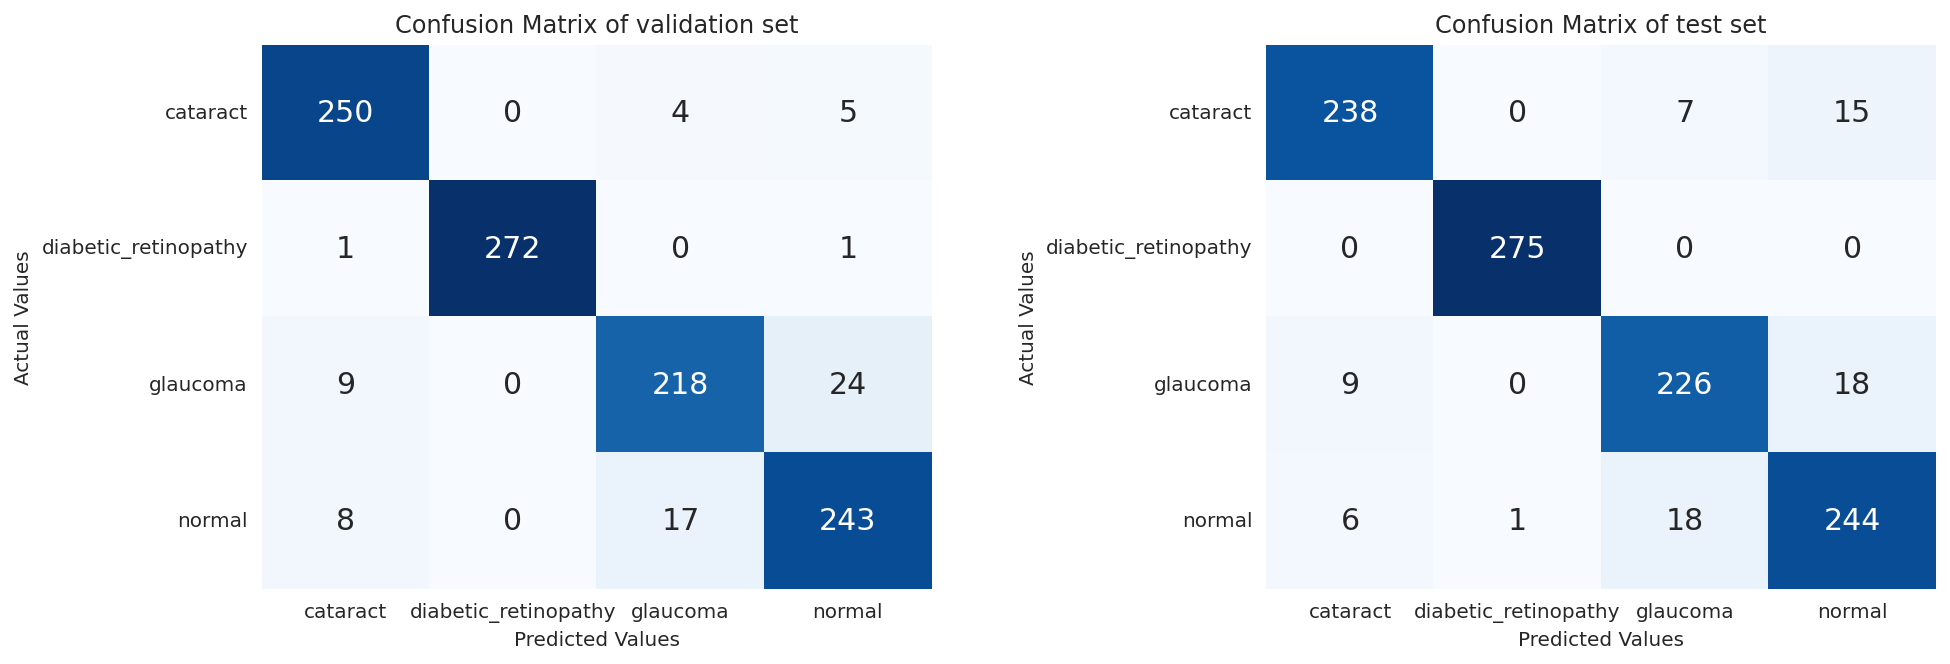

In [ ]:
#Plotting confusion matrices using heatmap
fig, axes = plt.subplots(1, 2, figsize=(15,5))
#sns.heatmap(train_cm_df, annot=True, cbar=False, cmap='Blues', vmin=0, fmt='.3g', annot_kws={"size": 15}, ax=axes[0])
#axes[0].set_title('Confusion Matrix of train set')
#axes[0].set_ylabel('Actual Values')
#axes[0].set_xlabel('Predicted Values')

sns.heatmap(val_cm_df, annot=True, cbar=False, cmap='Blues', vmin=0, fmt='.3g', annot_kws={"size": 15}, ax=axes[0])
axes[0].set_title('Confusion Matrix of validation set')
axes[0].set_ylabel('Actual Values')
axes[0].set_xlabel('Predicted Values')

sns.heatmap(test_cm_df, annot=True, cbar=False, cmap='Blues', vmin=0, fmt='.3g', annot_kws={"size": 15}, ax=axes[1])
axes[1].set_title('Confusion Matrix of test set')
axes[1].set_ylabel('Actual Values')
axes[1].set_xlabel('Predicted Values')

plt.subplots_adjust(wspace=0.5)

plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, test_preds, target_names=class_names, digits= 4))

                      precision    recall  f1-score   support

            cataract     0.9407    0.9154    0.9279       260
diabetic_retinopathy     0.9964    1.0000    0.9982       275
            glaucoma     0.9004    0.8933    0.8968       253
              normal     0.8809    0.9071    0.8938       269

           micro avg     0.9300    0.9300    0.9300      1057
           macro avg     0.9296    0.9289    0.9292      1057
        weighted avg     0.9303    0.9300    0.9301      1057
         samples avg     0.9300    0.9300    0.9300      1057



In [ ]:
# extract test file names from test_ds 
# this cannot do with tensorflow datasets that are prefetched autotuned
test_filenames = test_ds.file_paths

In [ ]:
len(test_filenames)

1057

In [ ]:
class_names

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

In [ ]:
# convert OHE to interger version of class_names for easier comparison 
y_true = tf.argmax(test_labels, axis=1).numpy() # tensor object not iterable, use numpy to convert to list
y_pred = tf.argmax(test_preds, axis=1).numpy()
print('First 5 true labels:', y_true[:5])
print('First 5 predictions:', y_pred[:5])

error_list = []

for a, b, c, d in zip(y_true, y_pred, y_pred_probs, test_filenames):
  if a != b:
    error_list.append((class_names[a],class_names[b],c,d))

First 5 true labels: [0 0 0 0 0]
First 5 predictions: [0 0 3 0 0]


In [ ]:
len(error_list)

74

In [ ]:
print('Prediction accuracy on test data:', 100 - (len(error_list)*100/len(test_filenames)), '%')

Prediction accuracy on test data: 92.99905392620624 %


In [ ]:
error_list[:5] # check for duplicates

[('cataract',
  'normal',
  0.87112725,
  './work_directory/test/cataract/1102_left.jpg'),
 ('cataract',
  'normal',
  0.7997699,
  './work_directory/test/cataract/119_left.jpg'),
 ('cataract',
  'normal',
  0.7553178,
  './work_directory/test/cataract/1415_right.jpg'),
 ('cataract',
  'normal',
  0.96078753,
  './work_directory/test/cataract/1454_right.jpg'),
 ('cataract',
  'normal',
  0.96895075,
  './work_directory/test/cataract/1456_left.jpg')]

In [ ]:
def print_in_color(txt_msg,fore_tupple=(0,255,255),back_tupple=(100,100,100)):
    #prints the text_msg in the foreground color specified by fore_tupple with the background specified by back_tupple 
    #text_msg is the text, fore_tupple is foregroud color tupple (r,g,b), back_tupple is background tupple (r,g,b)
    # default parameter print in cyan foreground and gray background
    rf,gf,bf=fore_tupple
    rb,gb,bb=back_tupple
    msg='{0}' + txt_msg
    mat='\33[38;2;' + str(rf) +';' + str(gf) + ';' + str(bf) + ';48;2;' + str(rb) + ';' +str(gb) + ';' + str(bb) +'m' 
    print(msg .format(mat), flush=True)
    print('\33[0m', flush=True) # returns default print color to back to black
    return

# example default print
msg='test of default colors'
print_in_color(msg)

test of default colors



In [ ]:
import re

print ('Below is a list of test files that were misclassified \n')
msg='{0:^10}{1:^30s}{2:^20s}{3:^20s}{4:^15s}'.format('No.','Test File','True Label','Predicted as','Probability')
print_in_color(msg)

for i, (a, b, c, d) in enumerate(error_list):
  x = re.split('./work_directory/test/', d)[-1]
  print('{0:^10}{1:^30s}{2:^20s}{3:^20s}  {4:.4f}'.format(i+1,x,a,b,c)) 

Below is a list of test files that were misclassified 

   No.              Test File                True Label         Predicted as      Probability  

    1         cataract/1102_left.jpg          cataract             normal         0.8711
    2         cataract/119_left.jpg           cataract             normal         0.7998
    3        cataract/1415_right.jpg          cataract             normal         0.7553
    4        cataract/1454_right.jpg          cataract             normal         0.9608
    5         cataract/1456_left.jpg          cataract             normal         0.9690
    6         cataract/1484_left.jpg          cataract             normal         0.8279
    7         cataract/1968_left.jpg          cataract             normal         0.9903
    8         cataract/1987_left.jpg          cataract             normal         0.9756
    9         cataract/2052_left.jpg          cataract             normal         0.9842
    10       cataract/2074_right.jpg          

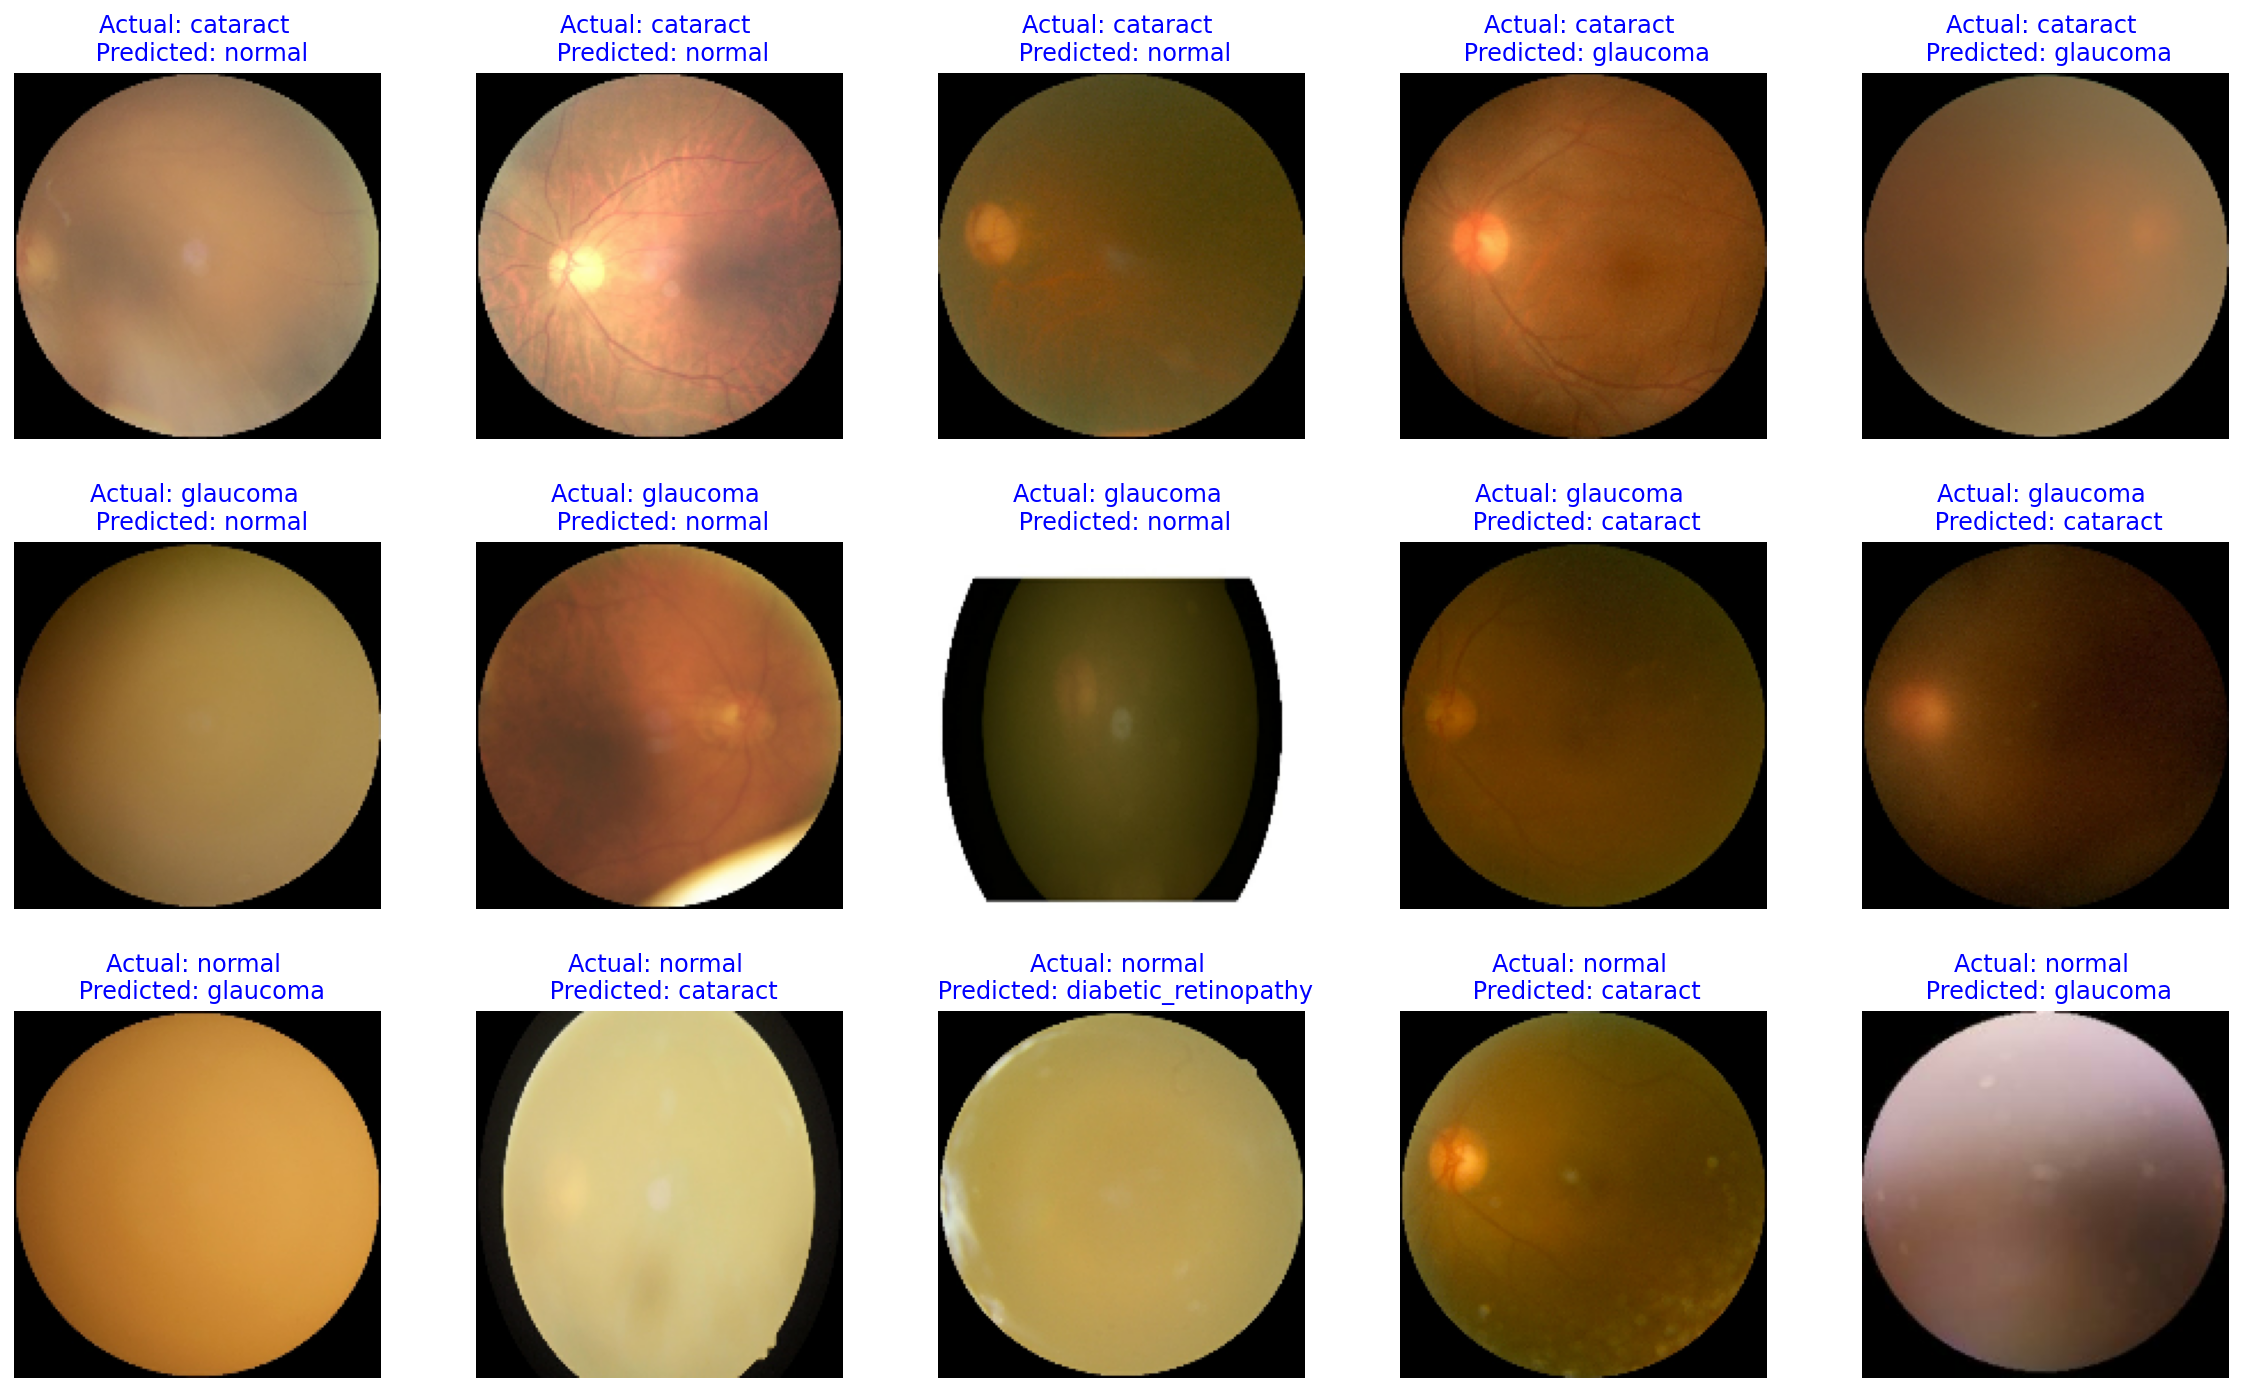

In [ ]:
# to display examples of each class that was wrongly classified
fig, axes = plt.subplots(3, 5, figsize=(20, 12)) # 3 rows, 5 cols

def axes_img(r,c,i):
  axes[r,c].imshow(test_images[i].astype('uint8'))
  axes[r,c].axis('off')
  axes[r,c].set_title(f'Actual: {error_list[i][0]} \n Predicted: {error_list[i][1]}', color='blue')

axes_img(r=0,c=0,i=0)  # first row - actual cataract
axes_img(r=0,c=1,i=5)
axes_img(r=0,c=2,i=10)
axes_img(r=0,c=3,i=15)
axes_img(r=0,c=4,i=20)

axes_img(r=1,c=0,i=23) # 2nd row - actual glaucoma 
axes_img(r=1,c=1,i=29)
axes_img(r=1,c=2,i=35)
axes_img(r=1,c=3,i=42)
axes_img(r=1,c=4,i=48)

axes_img(r=2,c=0,i=50) # 3rd row - actual normal
axes_img(r=2,c=1,i=54) 
axes_img(r=2,c=2,i=62)
axes_img(r=2,c=3,i=68)
axes_img(r=2,c=4,i=73)

plt.subplots_adjust(hspace=0.28) # add space between rows
plt.show()

In [ ]:
# useful functions
def input_img(path): #read source image file
    image = tf.image.decode_png(tf.io.read_file(path))
    image = tf.expand_dims(image, axis=0)
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, [160,160])
    return image
def normalize_image(img): #normalise image
    grads_norm = img[:,:,0]+ img[:,:,1]+ img[:,:,2]
    grads_norm = (grads_norm - tf.reduce_min(grads_norm))/ (tf.reduce_max(grads_norm)- tf.reduce_min(grads_norm))
    return grads_norm
# see this for cmap options: https://matplotlib.org/stable/tutorials/colors/colormaps.html
def plot_maps(img1, img2,vmin=0.3,vmax=0.7, mix_val=2): 
    f = plt.figure(figsize=(15,45))
    plt.subplot(1,3,1)
    plt.imshow(img1,vmin=vmin, vmax=vmax, cmap="terrain")
    plt.title('Saliency map')
    plt.axis("off")
    plt.subplot(1,3,2)
    plt.imshow(img2, cmap = "terrain")
    plt.title('Input image')
    plt.axis("off")
    plt.subplot(1,3,3)
    plt.imshow(img1*mix_val+img2/mix_val, cmap = "terrain" )
    plt.title('Overlayed image')
    plt.axis("off")
def plot_orig_img(filepath):
    img_path = filepath
    input_im = input_img(img_path)
    input_im = tf.keras.applications.efficientnet_v2.preprocess_input(input_im)
    plt.imshow(normalize_image(input_im[0]))
    plt.axis('off');
    return input_im
def plot_gradient_maps(input_im): # plot_maps() function embedded
    with tf.GradientTape() as tape:
        tape.watch(input_im)
        result_img = model(input_im)
        max_idx = tf.argmax(result_img,axis = 1)
        max_score = result_img[0,max_idx[0]]
    grads = tape.gradient(max_score, input_im)
    plot_maps(normalize_image(grads[0]), normalize_image(input_im[0]))

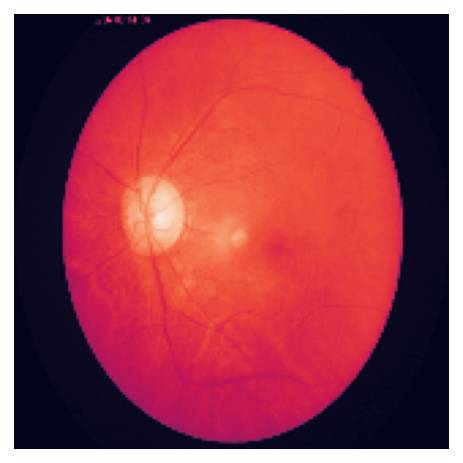

In [ ]:
# using 1 example to demonstrate
input_im = plot_orig_img(filepath="./dataset/glaucoma/1495_left.jpg");

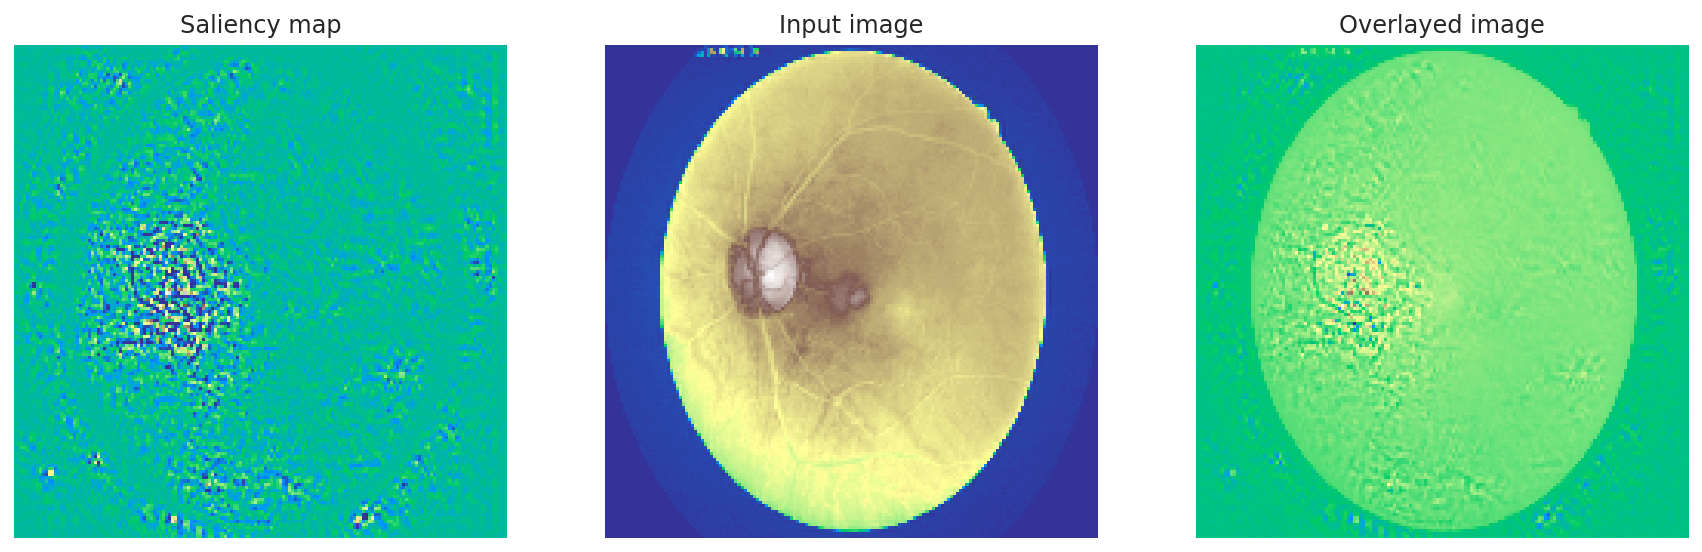

In [ ]:
plot_gradient_maps(input_im)

How model interprets retinal image with diabetic retinopathy: 

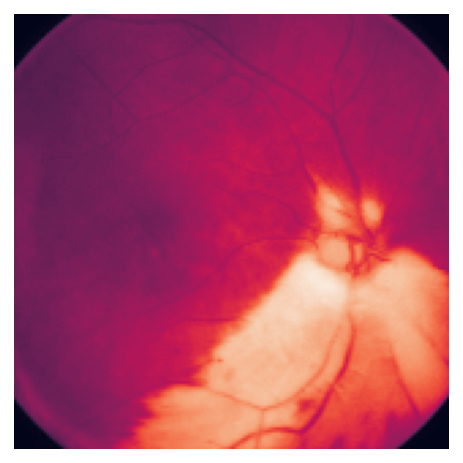

In [ ]:
# using 1 example to demonstrate
input_im = plot_orig_img(filepath="./dataset/diabetic_retinopathy/1145_left.jpeg");

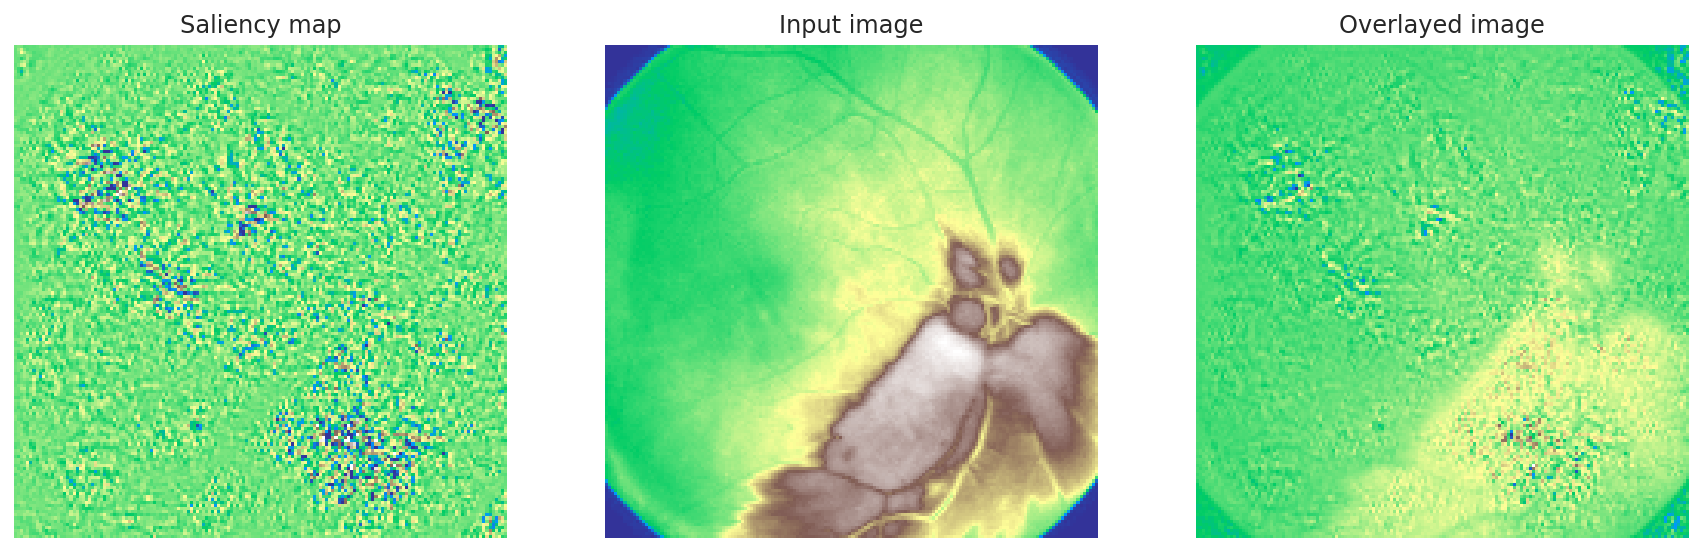

In [ ]:
plot_gradient_maps(input_im)

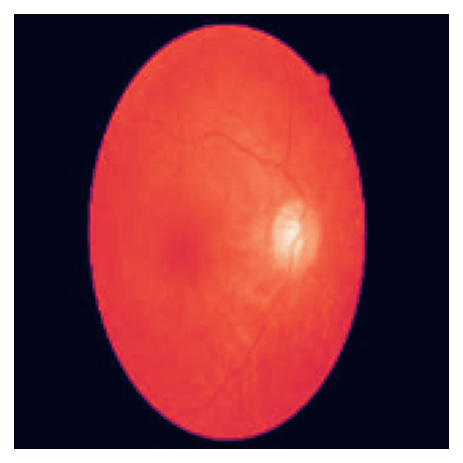

In [ ]:
# using 1 example to demonstrate
input_im = plot_orig_img(filepath="./dataset/cataract/_331_2978484.jpg");

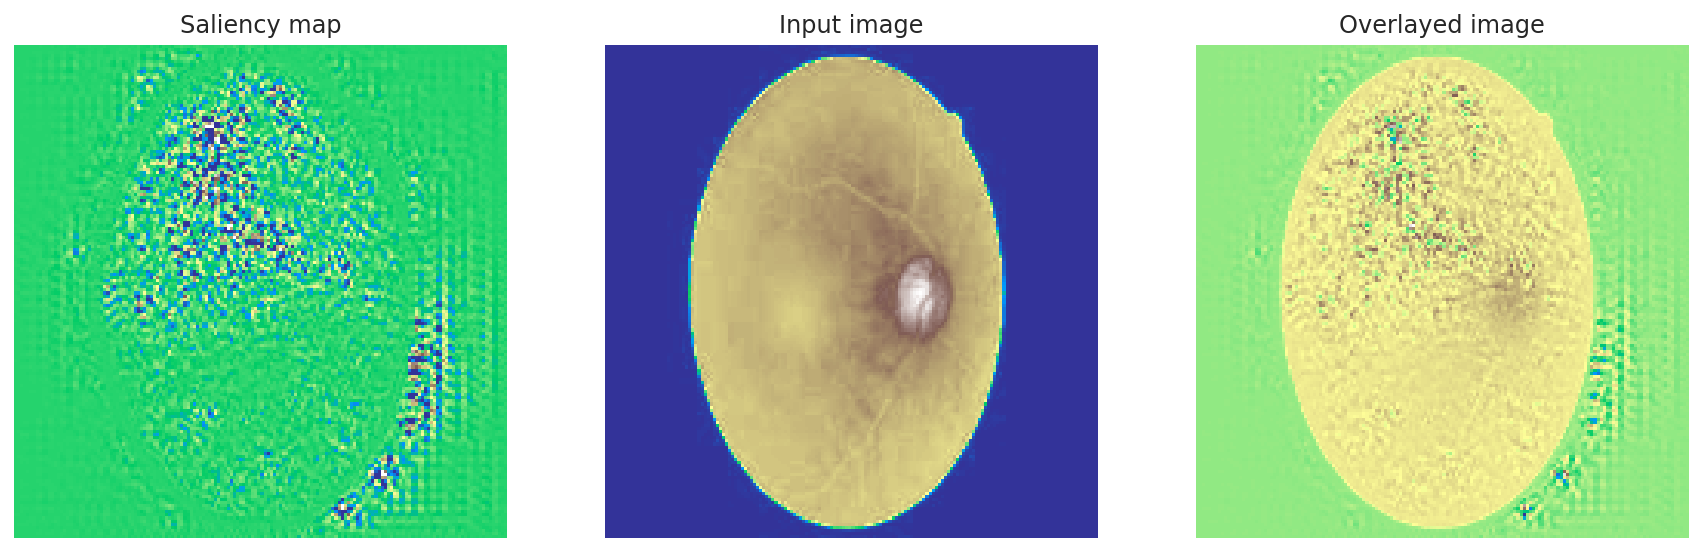

In [ ]:
plot_gradient_maps(input_im)

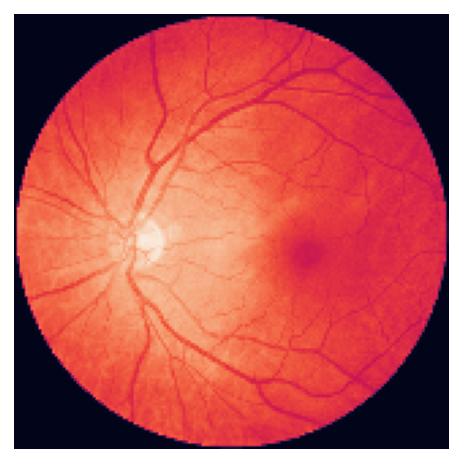

In [ ]:
# using 1 example to demonstrate
input_im = plot_orig_img(filepath="./dataset/normal/2627_left.jpg");

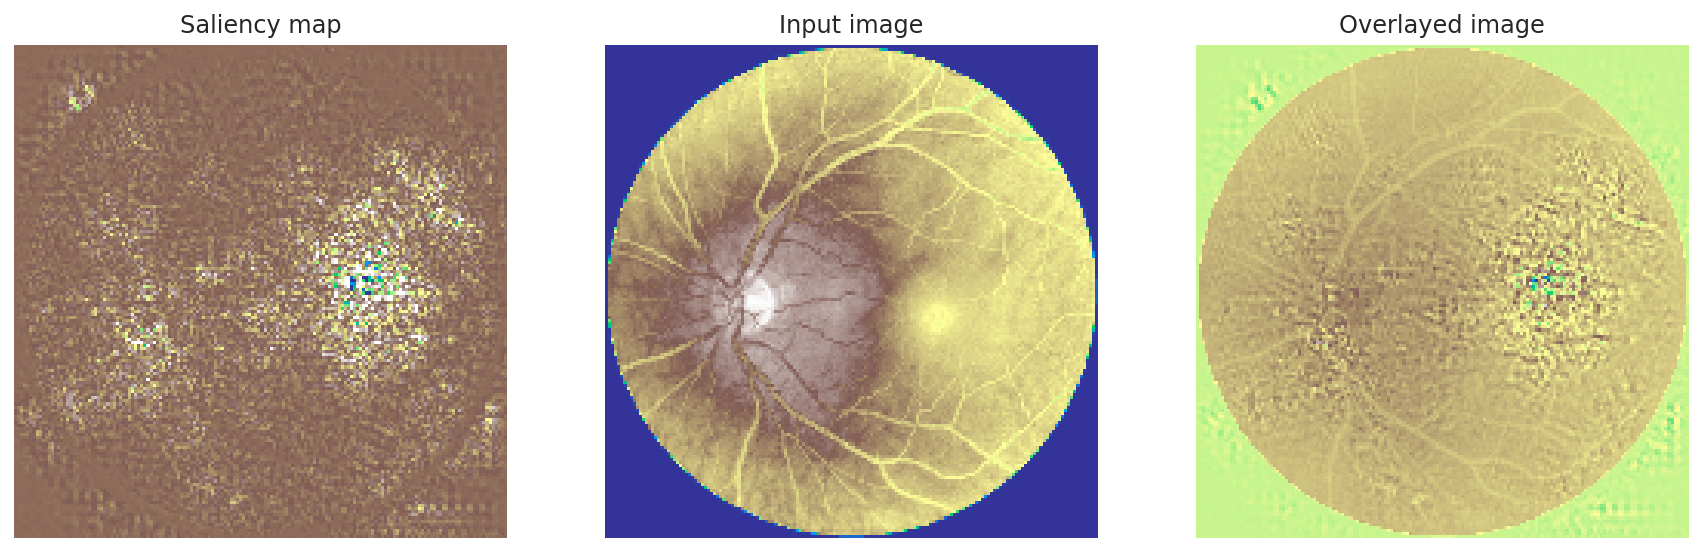

In [ ]:
plot_gradient_maps(input_im)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow # cv2.imshow does not work on Google Colab notebooks, which is why we are using cv2_imshow instead

In [ ]:
model.summary() # to get final convolutional layer name

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_5 (Rescaling)        (None, 160, 160, 3)  0           ['input_4[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 80, 80, 24)   648         ['rescaling_5[0][0]']            
                                                                                                  
 stem_bn (BatchNormalization)   (None, 80, 80, 24)   96          ['stem_conv[0][0]']          

Insert text to openCV images

[Reference](https://stackoverflow.com/questions/42420470/opencv-subplots-images-with-titles-and-space-around-borders)

[Another reference](https://answers.opencv.org/question/175912/how-to-display-multiple-images-in-one-window/)

In [ ]:
def gradCAM(orig, intensity=0.5, res=250): # function

  img = tf.keras.preprocessing.image.load_img(orig, target_size=(160, 160))

  x = tf.keras.preprocessing.image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = tf.keras.applications.efficientnet_v2.preprocess_input(x) # shape (1,160,160,3)

  with tf.GradientTape() as tape: # Grad-CAM process
    last_conv_layer = model.get_layer('top_conv')
    iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output]) # create mini model function to get model output
    model_out, last_conv_layer = iterate(x) # model_out shape (1,4)
    class_out = model_out[:, np.argmax(model_out[0])]
    grads = tape.gradient(class_out, last_conv_layer)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    
  heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)
  heatmap = np.maximum(heatmap, 0) 
  heatmap /= np.max(heatmap) # minmax pixel values (0,1)
  heatmap = heatmap.reshape((5, 5)) # reshape to 5x5 array

  img = cv2.imread(orig)

  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

  heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET) # multiply 255 to convert to RGB form

  img = heatmap * intensity + img
  
  img1 = cv2.resize(cv2.imread(orig), (res, res)) # visualise original image
  img2 = cv2.resize(img, (res, res)) # visualise heatmap overlay
  combined_img = np.concatenate((img1,img2), axis=1)
  # put grey headings
  grey= np.zeros((30, combined_img.shape[1], 3), np.uint8)
  grey[:] = (169, 169, 169) 
  # join grey heading with combined_img
  vcat = np.concatenate((grey, combined_img), axis=0)
  # insert text
  font = cv2.FONT_HERSHEY_DUPLEX
  cv2.putText(vcat, 'Original image + Activation heatmap', (20,20), font, 0.7,(0,0,0), 1, 0)
  cv2_imshow(vcat)


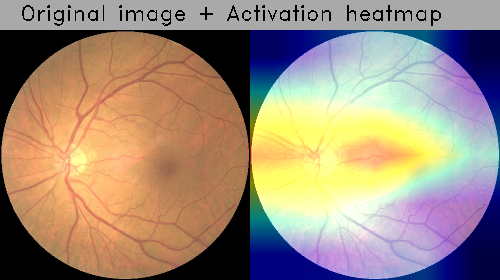

In [ ]:
gradCAM(orig='./dataset/normal/2627_left.jpg')

For glaucoma image: 

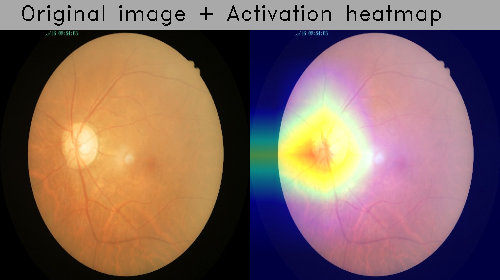

In [ ]:
gradCAM(orig="./dataset/glaucoma/1495_left.jpg")

For cataract image:

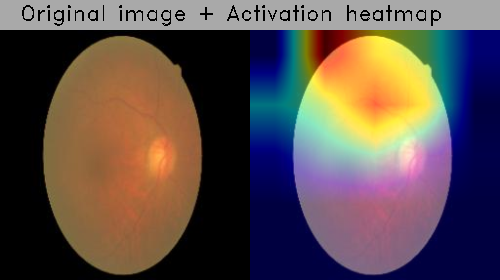

In [ ]:
gradCAM(orig="./dataset/cataract/_331_2978484.jpg")

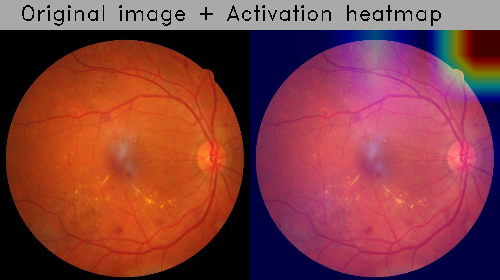

In [ ]:
gradCAM(orig="./dataset/diabetic_retinopathy/1008_right.jpeg")

In [ ]:
IRN_model = tf.keras.models.load_model("drive/MyDrive/Colab Notebooks/IRN_ep13_val0.347", 
                                   custom_objects={'f1_score': f1_score})

In [ ]:
# generate predictions from IRN_model

test_ds_resized = image_dataset_from_directory( # resized to fit IRN model
    './work_directory/test',
    image_size=(299,299),
    #labels='inferred',
    seed=1,
    shuffle=False,
    batch_size=batch_size,
    label_mode='categorical'
)

IRN_y_proba = IRN_model.predict(test_ds_resized, verbose=1)

Found 1057 files belonging to 4 classes.
34/34 [==============================] - 39s 1s/step


In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix

In [ ]:
def plot_roc_curve(tpr, fpr, axes):
    sns.lineplot(x = fpr, y = tpr, ax=axes)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'forestgreen', linestyle='--', ax=axes)
    axes.set_xlabel("False Positive Rate")
    axes.set_ylabel("True Positive Rate")
def calculate_tpr_fpr(y_real, y_pred):
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    return tpr, fpr
def get_all_roc_coordinates(y_real, y_proba):
        '''
        Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a treshold for the predicion of the class.
        
        Args:
            y_real: The list or series with the real classes.
            y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
            
        Returns:
            tpr_list: The list of TPRs representing each threshold.
            fpr_list: The list of FPRs representing each threshold.
        '''
        tpr_list = [0]
        fpr_list = [0]
        for i in range(len(y_proba)):
            threshold = y_proba[i]
            y_pred = y_proba >= threshold
            tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
            tpr_list.append(tpr)
            fpr_list.append(fpr)
        return tpr_list, fpr_list

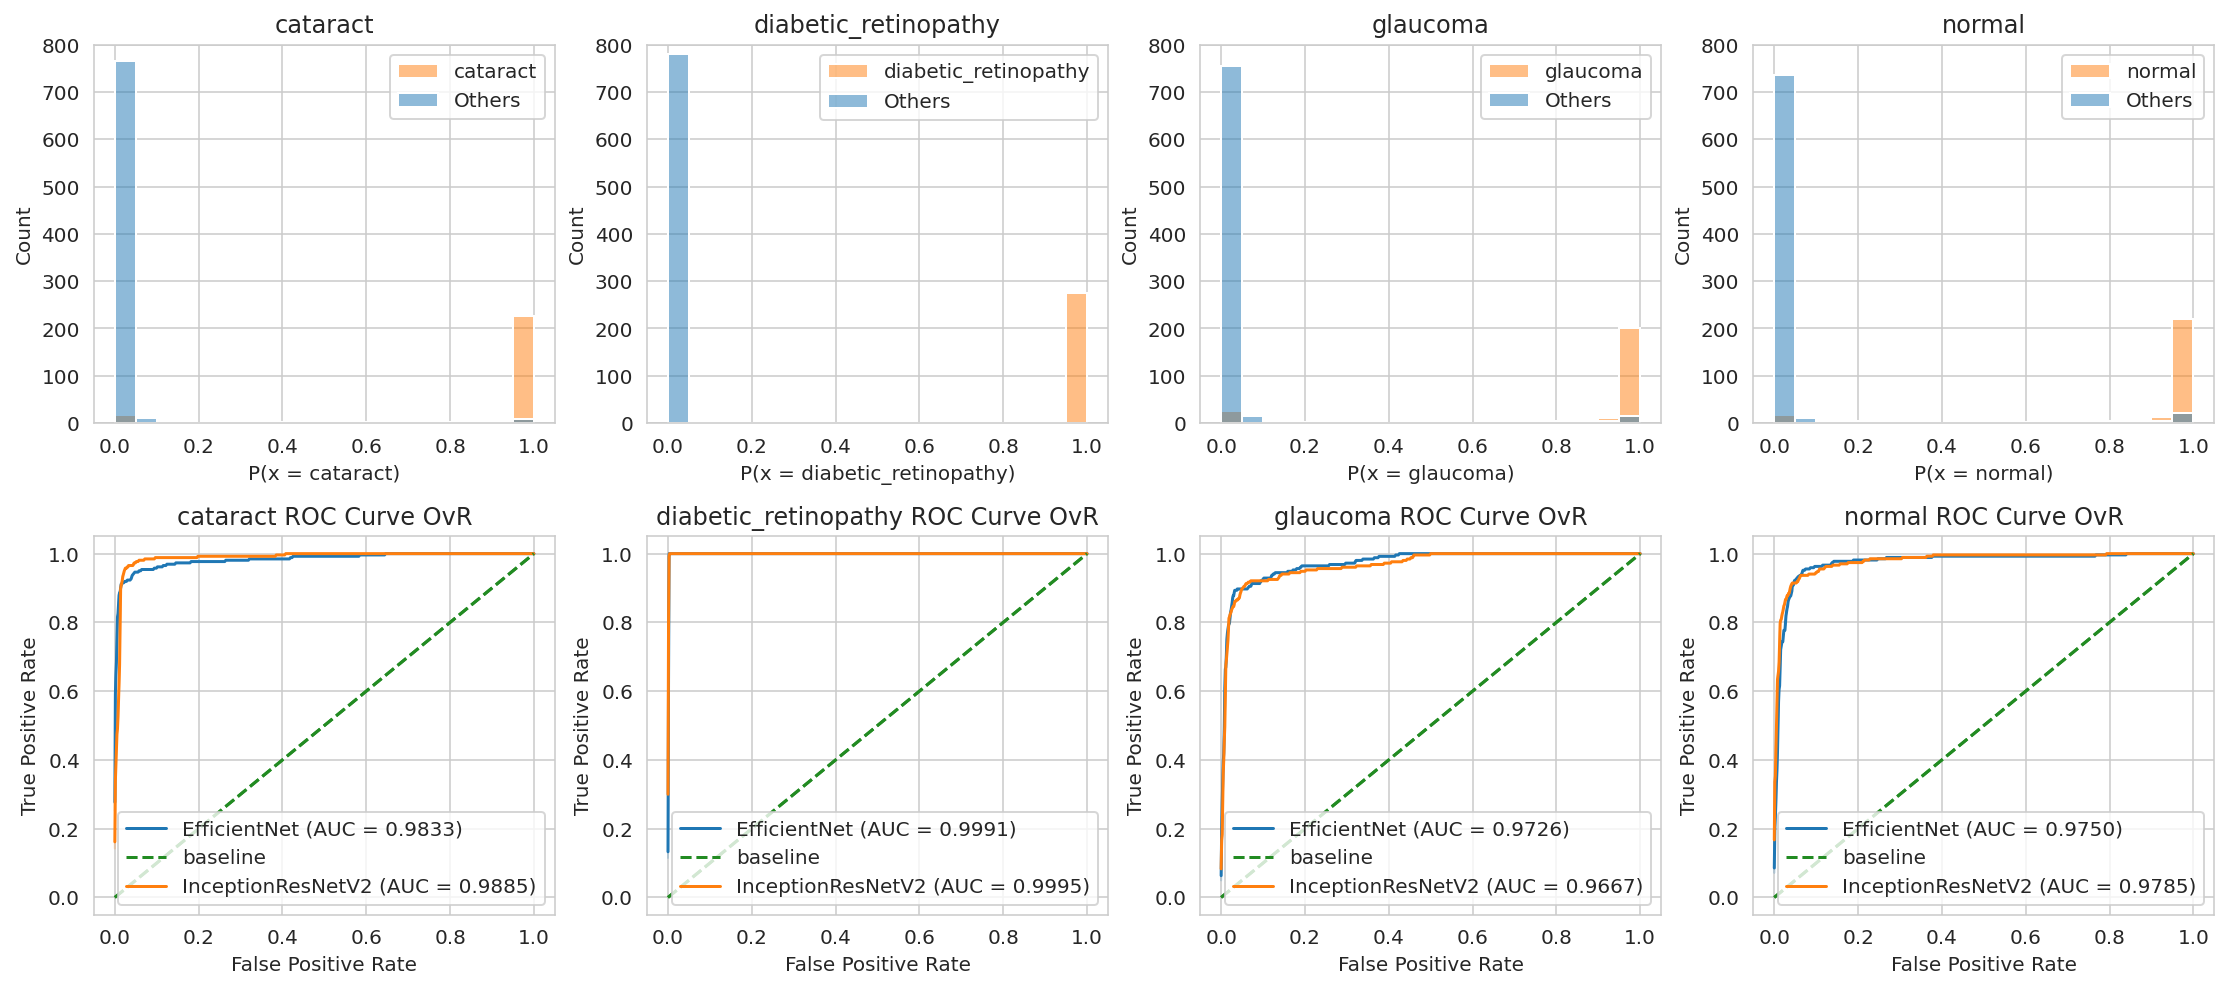

In [ ]:
# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (19, 8))
bins = [i/20 for i in range(20)] + [1]
# class_names
ENet_auc_ovr = {}
IRN_auc_ovr = {}
for i in range(4):
    # Gets the class
    c = class_names[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = pd.DataFrame() # instantiate pandas dataframe
    df_aux['class'] = [1 if y == i else 0 for y in test_labels.argmax(axis=1)]
    df_aux['prob'] = y_proba[:, i] # list of probabilities for each class[i]
    df_aux['IRN_prob'] = IRN_y_proba[:, i] # list of probabilities for IRN model for each class[i]
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 4, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.set_ylim([0,800])
    ax.legend([f"{c}", "Others"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 4, i+5)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    irn_tpr, irn_fpr = get_all_roc_coordinates(df_aux['class'], df_aux['IRN_prob'])
    plot_roc_curve(tpr, fpr, axes=ax_bottom)
    plot_roc_curve(irn_tpr, irn_fpr, axes=ax_bottom)
    # Calculates the ROC AUC OvR
    ENet_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
    IRN_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['IRN_prob'])
    # set title and legend
    ax_bottom.set_title(f"{c} ROC Curve OvR")
    ax_bottom.legend([f"EfficientNet (AUC = {ENet_auc_ovr[c]:.4f})", 
                      "baseline", 
                      f"InceptionResNetV2 (AUC = {IRN_auc_ovr[c]:.4f})"])

    # space above and bottom subplots 
    plt.subplots_adjust(hspace=0.3)

In [ ]:
# PR curve
from sklearn.metrics import precision_recall_curve, average_precision_score

In [ ]:
def calculate_pr_recall(y_real, y_pred):
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    # Calculates tpr and fpr
    pr =  TP/(TP + FP) # precision
    recall = TP/(TP+FN) # recall
    return pr, recall
def get_all_pr_coordinates(y_real, y_proba):
        '''
        Calculates all the PR Curve coordinates (pr and recall) by considering each point as a treshold for the predicion of the class.
        
        Args:
            y_real: The list or series with the real classes.
            y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
            
        Returns:
            pr_list: The list of positive predictive values representing each threshold.
            recall_list: The list of sensitivities representing each threshold.
        '''
        pr_list = [1]
        recall_list = [0.0]
        for i in range(len(y_proba)):
            threshold = y_proba[i]
            y_pred = y_proba >= threshold
            pr, recall = calculate_pr_recall(y_real, y_pred)
            pr_list.append(pr)
            recall_list.append(recall)
        return pr_list, recall_list
def plot_pr_curve(pr, recall, axes):
    sns.lineplot(x = recall, y = pr, ax=axes)
    sns.lineplot(x = [0, 1], y = [0.25, 0.25], color = 'forestgreen', linestyle='--', ax=axes)
    axes.set_ylim(0.2, 1.05)
    axes.set_xlabel("Recall")
    axes.set_ylabel("Precision")

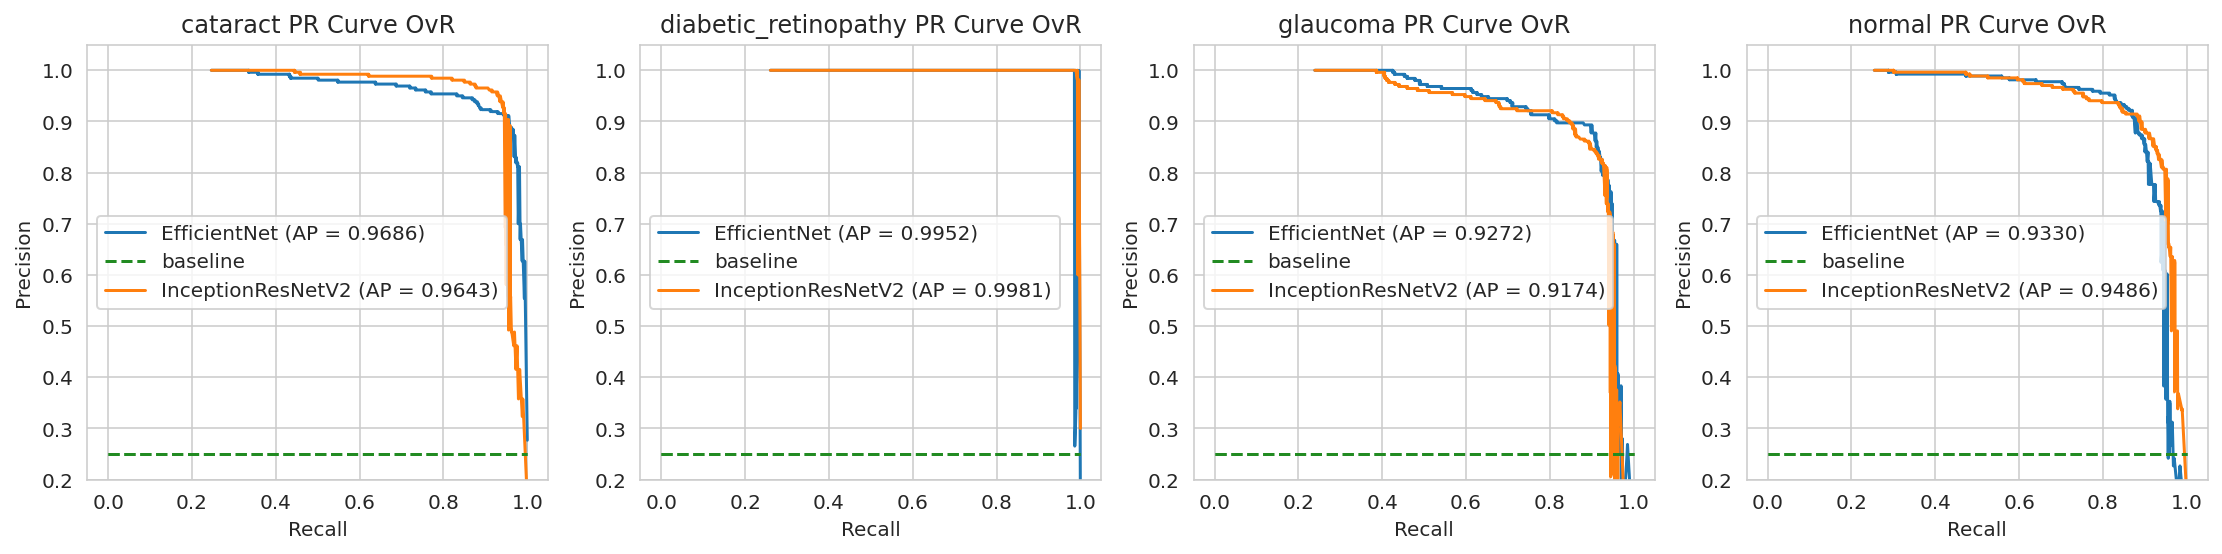

In [ ]:
# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (19, 4))
bins = [i/20 for i in range(20)] + [1]
# class_names
ENet_pr_ovr = {}
IRN_pr_ovr = {}
for i in range(4):
    # Gets the class
    c = class_names[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = pd.DataFrame() # instantiate pandas dataframe
    df_aux['class'] = [1 if y == i else 0 for y in test_labels.argmax(axis=1)]
    df_aux['prob'] = y_proba[:, i] # list of probabilities for each class[i]
    df_aux['IRN_prob'] = IRN_y_proba[:, i] # list of probabilities for IRN model for each class[i]
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax = plt.subplot(1, 4, i+1)
    pr, recall = get_all_pr_coordinates(df_aux['class'], df_aux['prob'])
    irn_pr, irn_recall = get_all_pr_coordinates(df_aux['class'], df_aux['IRN_prob'])
    plot_pr_curve(recall, pr, axes=ax)
    plot_pr_curve(irn_recall, irn_pr, axes=ax)
    # Calculates the PR OvR
    ENet_pr_ovr[c] = average_precision_score(df_aux['class'], df_aux['prob'])
    IRN_pr_ovr[c] = average_precision_score(df_aux['class'], df_aux['IRN_prob'])

    # set title and legend
    ax.set_title(f"{c} PR Curve OvR")
    ax.legend([f"EfficientNet (AP = {ENet_pr_ovr[c]:.4f})", 
               "baseline",
               f"InceptionResNetV2 (AP = {IRN_pr_ovr[c]:.4f})"], loc='center left')

In [ ]:
# Converting a SavedModel to a TensorFlow Lite model.
converter = tf.lite.TFLiteConverter.from_saved_model('./drive/MyDrive/Colab Notebooks/ENet_ep20_val0.311')
tflite_model = converter.convert()

# Save the model.
with open('./drive/MyDrive/Colab Notebooks/ENet_model.tflite', 'wb') as f:
  f.write(tflite_model)